# Qiskit 1.x

Antes do Qiskit 1.0, as versões eram de desenvolvimento. Doravante é para o Qiskit (Qiskit 1.x) ser mais estável e eficiente. Isso com o objetivo de lidar com centenas de qubits. Por isso, houveram grandes mudanças na programação. Quem já aprendeu o antigo Qiskit (Qiskit 0.x), vai ter que reaprendê-lo.

Para instalar o Qiskit 1.0, recomenda-se usar o anaconda, ou o miniconda. Para evitar problemas de compatibilidade, crie um novo ambiente:
- conda create --name myenv

Acima myenv é o nome do ambiente, e.g., qk1. Ative o seu ambiente usando:
- conda activate myenv

Para verificar que ambientes você tem criados no anaconda, use
- conda env list

Dentro desse ambiente, instale algumas bibliotecas e pacotes que você irá precisar:
- conda install pip

Use o pip para instalar (quem usa o __Google Colab__ começa aqui):
- pip install qiskit
- pip install matplotlib
- pip install qiskit-ibm-runtime
- pip install pylatexenc
- pip install qiskit_aer

In [1]:
!pip install qiskit
!pip install matplotlib
!pip install qiskit-ibm-runtime
!pip install pylatexenc
!pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 23.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━

Teste sua instalação usando:

In [ ]:
import qiskit

In [ ]:
qiskit.__version__

'1.1.0'

Para mais informações, veja
- github.com/Qiskit/qiskit

## Conectando com a plataforma IBMQ

Você precisará ter uma conta cadastrada em
- quantum.ibm.com

Nessa plataform você poderá ver quais simuladores clássicos e chips quânticos estão disponíveis para você, as propriedades dos chips, o jobs que você executou, materiais para estudo, etc.

Para fazer isso, você vai precisar importar o QiskitRuntimeService:

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

Usando seu __API token__ obtido na plataforma IBMQ, defina a seguinte variável:
- service = QiskitRuntimeService(channel="ibm_quantum", toke="API token")

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum", token="83ab2a86232e48767228534cdae2cf55b8e8ea4e0eb1e57804268f40d7bee64692f719528e8871de617ffc35040d21bd389f4696313f46900c077c7f617a1512")

Feito isso, já podemos definir o backend que será usado posteriormente para executar os circuitos quânticos que criaremos. Para isso, use, por exemplo:
- backend = service.backend(name="ibm_brisbane")

As outras possibilidades podem ser vistas na plataforma IBMQ.

In [ ]:
backend = service.backend(name="ibm_brisbane")

## Hello world (2 qubits)

Vamos fazer nosso 1º programa, com todas as etapas, nessa nova versão do Qiskit. Vamos preparar o estado de Bell
$$|\Phi_+\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle + |11\rangle,$$
e medir alguns observáveis.

### Passo 1: Mapear o problema para circuitos e operadores

O código abaixo cria o circuito quântico que prepara o estado de Bell.

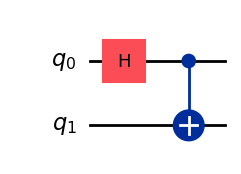

In [ ]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

qc.draw(output='mpl')

Abaixo definimos os observáveis que serão medidos.

In [ ]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ,ZI,IZ,XX,XI,IX]

### Passo 2: Otimizar os circuitos

Nesse caso, como usaremos o emulador clássico, não precisaremos otimizar os curcuitos para melhor adaptação ao mapa de conectividade do chip.

### Passo 3: Executar os circuitos no backend

O Qiskit 1.0 tem 2 primitivos. o primitivo Estimator é usado para obter valores médios, enquanto que o primitivo Sampler é usado para obter amostragens (contagens).

In [ ]:
from qiskit_aer.primitives import Estimator
estimator = Estimator() # inicializa o estimador
# manda a lista de circuitos e os respectivos observáveis a serem medidos
job = estimator.run([qc]*len(observables), observables)
job.result()

EstimatorResult(values=array([1.        , 0.05078125, 0.05078125, 1.        , 0.        ,
       0.        ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.002213542, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000761872, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 12978, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9974212646484375, 'simulator_metadata': [{'time_taken': 0.002213542, 'num_bind_params': 1, 'parallel_state_update': 2, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00076187

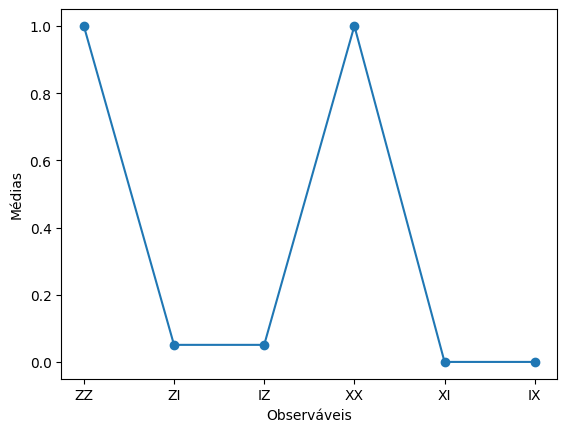

In [ ]:
import matplotlib.pyplot as plt
data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values
plt.plot(data, values, '-o')
plt.xlabel('Observáveis')
plt.ylabel('Médias')
plt.show()

In [ ]:
values # job.result().values é um array do Python

array([1.        , 0.05078125, 0.05078125, 1.        , 0.        ,
       0.        ])

In [ ]:
values[1] # Como acessar valores individuais de valor médio

0.05078125

## Hello World ($n$ qubits)

Vamos preparar um estado GHZ de $n$ qubits
$$|GHZ_n\rangle = \frac{1}{\sqrt{2}}\big(|000\cdots 000\rangle + |111\cdots 111\rangle\big),$$
e medir alguns observáveis.

### Passo 1: Mapear o problema em circuitos e observáveis

In [ ]:
def qc_ghz(n):
  qc = QuantumCircuit(n)
  qc.h(0)
  for j in range(0,n-1):
    qc.cx(j,j+1)
  return qc

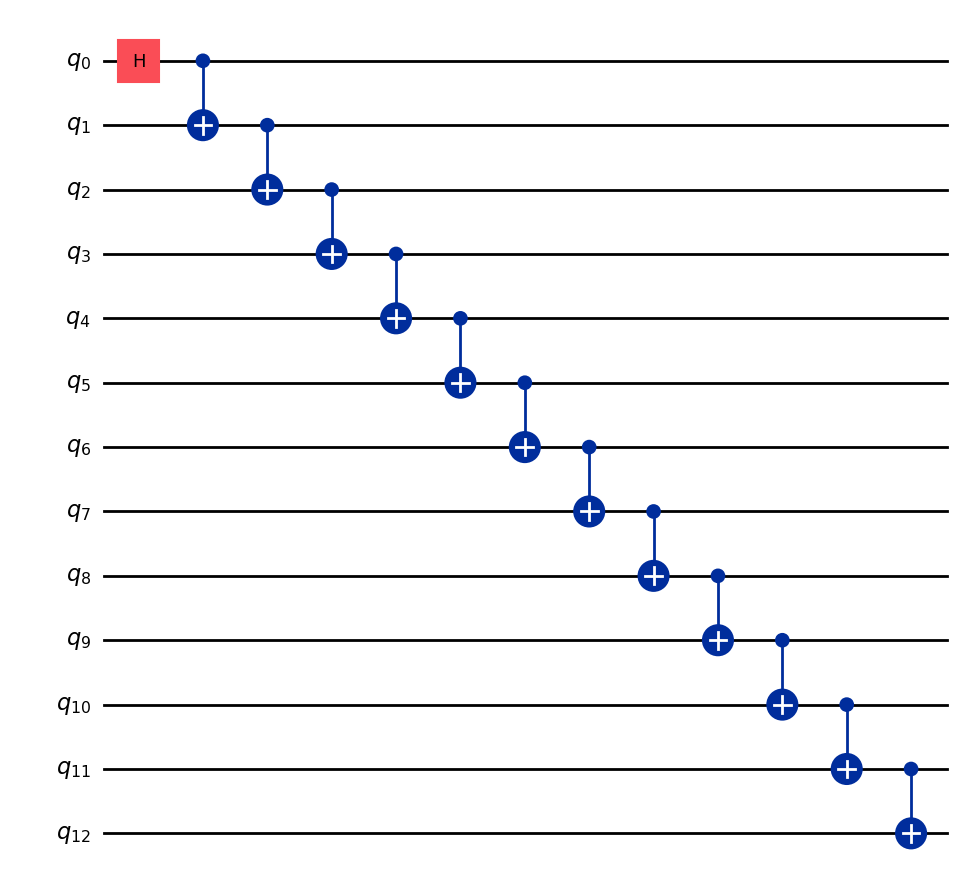

In [ ]:
n = 13
qc = qc_ghz(n)
qc.draw(output='mpl')

In [ ]:
from qiskit.quantum_info import SparsePauliOp # esparço para lidar com altas dimensões

operator_strings = ['Z' + 'I'*j + 'Z' + 'I'*(n-2-j) for j in range(n-1)]
print(operator_strings)
print(len(operator_strings))

['ZZIIIIIIIIIII', 'ZIZIIIIIIIIII', 'ZIIZIIIIIIIII', 'ZIIIZIIIIIIII', 'ZIIIIZIIIIIII', 'ZIIIIIZIIIIII', 'ZIIIIIIZIIIII', 'ZIIIIIIIZIIII', 'ZIIIIIIIIZIII', 'ZIIIIIIIIIZII', 'ZIIIIIIIIIIZI', 'ZIIIIIIIIIIIZ']
12


In [ ]:
# poderia usar também uma combinação linear desses operadores
operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]
operators

[SparsePauliOp(['ZZIIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIZIIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIZIIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIZIIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIZIIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIZIIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIIZIIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIIIZIIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIIIIZIII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIIIIIZII'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIIIIIIZI'],
               coeffs=[1.+0.j]),
 SparsePauliOp(['ZIIIIIIIIIIIZ'],
               coeffs=[1.+0.j])]

### Passo 2: Otimizar o problema para execução

In [ ]:
# define o backend a ser usado
from qiskit_ibm_runtime import QiskitRuntimeService
#backend_name = "ibm_brisbane"
#backend = QiskitRuntimeService().get_backend(backend_name) # deu erro
backend = service.backend(name="ibm_brisbane")

In [ ]:
# otimiza o circuito quântico para o backend definido acima
# ao otimizar, os índices dos qubits são trocados pelo transpilador conforme for mais conveniente
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
qc_transpiled = pass_manager.run(qc)
# adapta a lista de operadores para ser medida no circuito quântico transpilado/otimizado
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]

### Executa o circuito no chip quântico (no backend)

In [ ]:
# parece que o uso do EstimatorV2 simplifica as coisas
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

In [ ]:
estimator = Estimator(backend, options=options)
job = estimator.run([(qc_transpiled, operators_transpiled_list)])
job_id = job.job_id()
print(job_id)

csadm91d22n000818ky0


### Passo 4: Pós-processamento e visualização

A ideia básica é que a correlação decai com a distância entre os qubits

In [ ]:
job_id = 'csadm91d22n000818ky0'
job = service.job(job_id)

In [ ]:
job.result()[0].data.evs

array([ 1.2704918 ,  0.69521277,  0.67080745,  0.63622291,  0.60434322,
        0.59414226,  0.53690229,  0.56044539, -0.05742145, -0.03694069,
        0.17764579,  0.22984749])

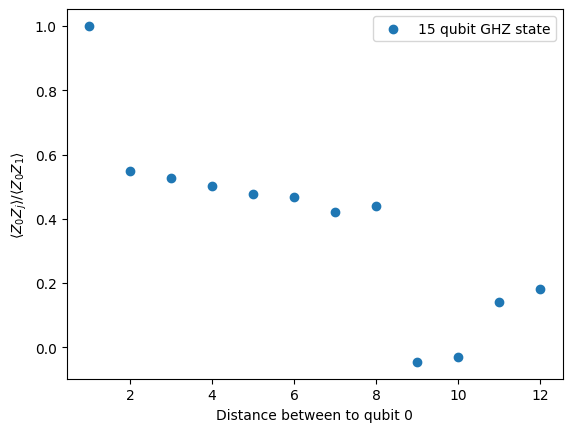

In [ ]:
import matplotlib.pyplot as plt
data = list(range(1,len(operators)+1))
result = job.result()[0]
values = result.data.evs
values = [v/values[0] for v in values]
plt.scatter(data, values, marker='o', label='15 qubit GHZ state')
plt.xlabel('Distance between to qubit 0')
plt.ylabel(r'$\langle Z_0 Z_j\rangle/\langle Z_0 Z_1\rangle$')
plt.legend()
plt.show()